In [151]:
import sklearn 
import scipy
from scipy import stats

In [152]:
import itertools as it
import matplotlib
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

In [153]:
import numpy as np
import pandas as pd

In [177]:
import os
os.getcwd()

'C:\\Users\\johnb'

In [178]:
data = pd.read_csv(r"C:/Users/johnb/Desktop/Newfile_3.csv")

In [179]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum())/data.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(2000)

,Total,Percent
Time of Delivery,1002,0.114501
Container Nr,1002,0.114501
Date of Delivery,645,0.073706
Transit Time,645,0.073706
Shippers Postal Code,345,0.039424
Sippers City Name,345,0.039424
Shippers Name,345,0.039424
Carriers Name,147,0.016798
Sending Railway Station,0,0.000000
Dispatch Date,0,0.000000


In [180]:
data.shape

(8751, 27)

In [181]:
'''
import numpy as np

# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

'''

'\nimport numpy as np\n\n# Create correlation matrix\ncorr_matrix = data.corr().abs()\n\n# Select upper triangle of correlation matrix\nupper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))\n\n# Find features with correlation greater than 0.95\nto_drop = [column for column in upper.columns if any(upper[column] > 0.90)]\n\n# Drop features \ndata.drop(to_drop, axis=1, inplace=True)\n\n'

In [182]:
data.dtypes

Dispatch Year                  int64
Dispatch Week                 object
Month of Dispacht              int64
Client Group                  object
Order No                      object
Client Booking Ref.           object
Container Nr                  object
Cont. Size                     int64
Cont. Type                    object
Direction                     object
Gross Weight                  object
Laden Status                  object
Dispatch Date                 object
Date of Delivery              object
Transit Time                 float64
Time of Delivery              object
Sending Railway Station       object
Receiving Railway Station     object
Shippers Name                 object
Sippers City Name             object
Shippers Postal Code         float64
No. of Debtor                  int64
Name of Debtor                object
TEU Volume                     int64
Carriers Name                 object
White Space                    int64
Costs Charged in €            object
d

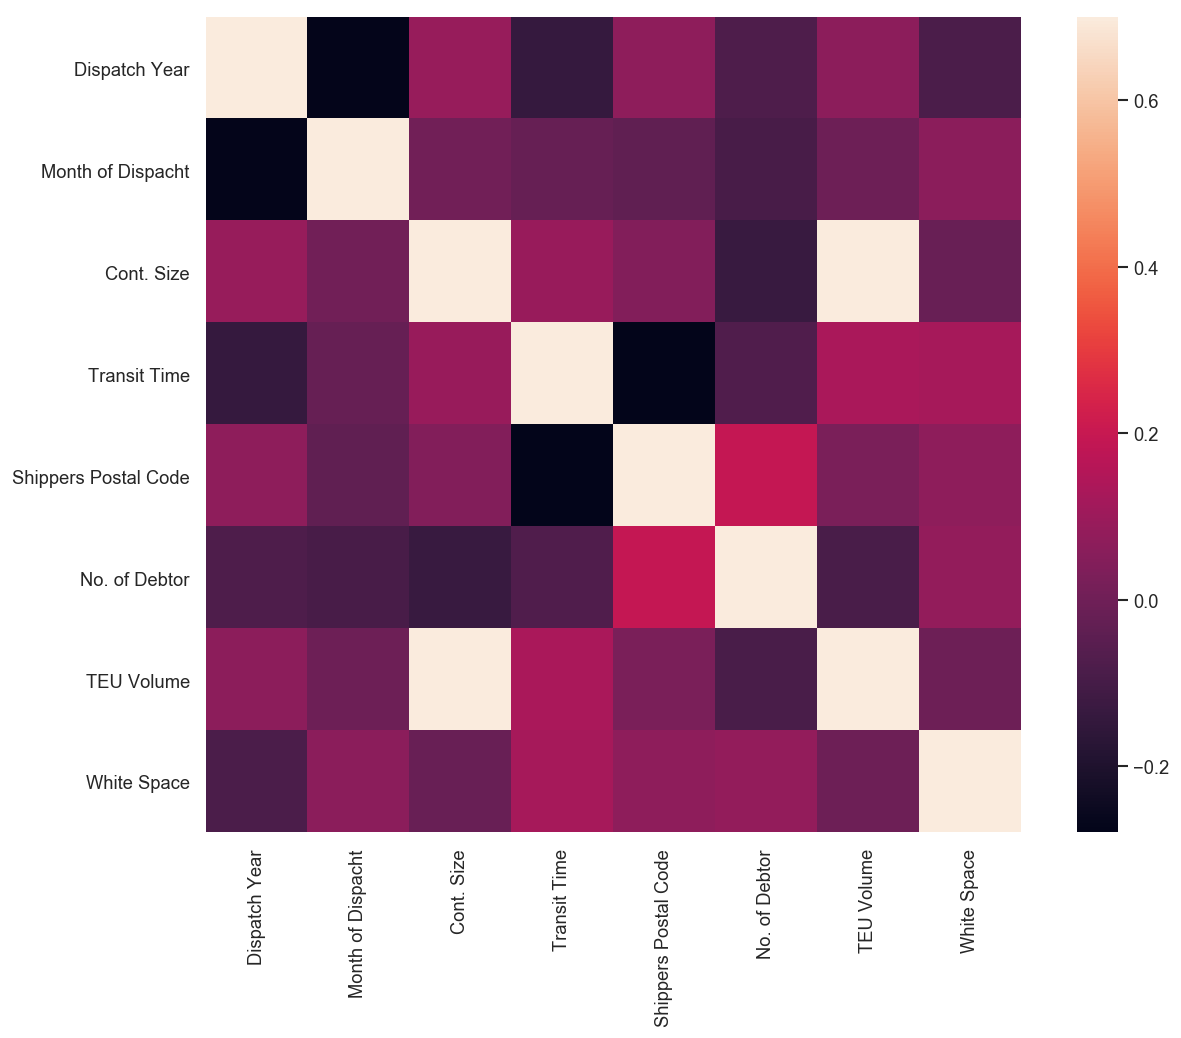

In [183]:
#Correlation map to see how features are correlated with SalePrice
import matplotlib.pyplot as plt
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.7, square=True)

In [184]:
data.columns

Index(['Dispatch Year', 'Dispatch Week', 'Month of Dispacht', 'Client Group',
       'Order No', 'Client Booking Ref.', 'Container Nr', 'Cont. Size',
       'Cont. Type', 'Direction', 'Gross Weight', 'Laden Status',
       'Dispatch Date', 'Date of Delivery', 'Transit Time', 'Time of Delivery',
       'Sending Railway Station', 'Receiving Railway Station', 'Shippers Name',
       'Sippers City Name', 'Shippers Postal Code', 'No. of Debtor',
       'Name of Debtor', 'TEU Volume', 'Carriers Name', 'White Space',
       'Costs Charged in €'],
      dtype='object')

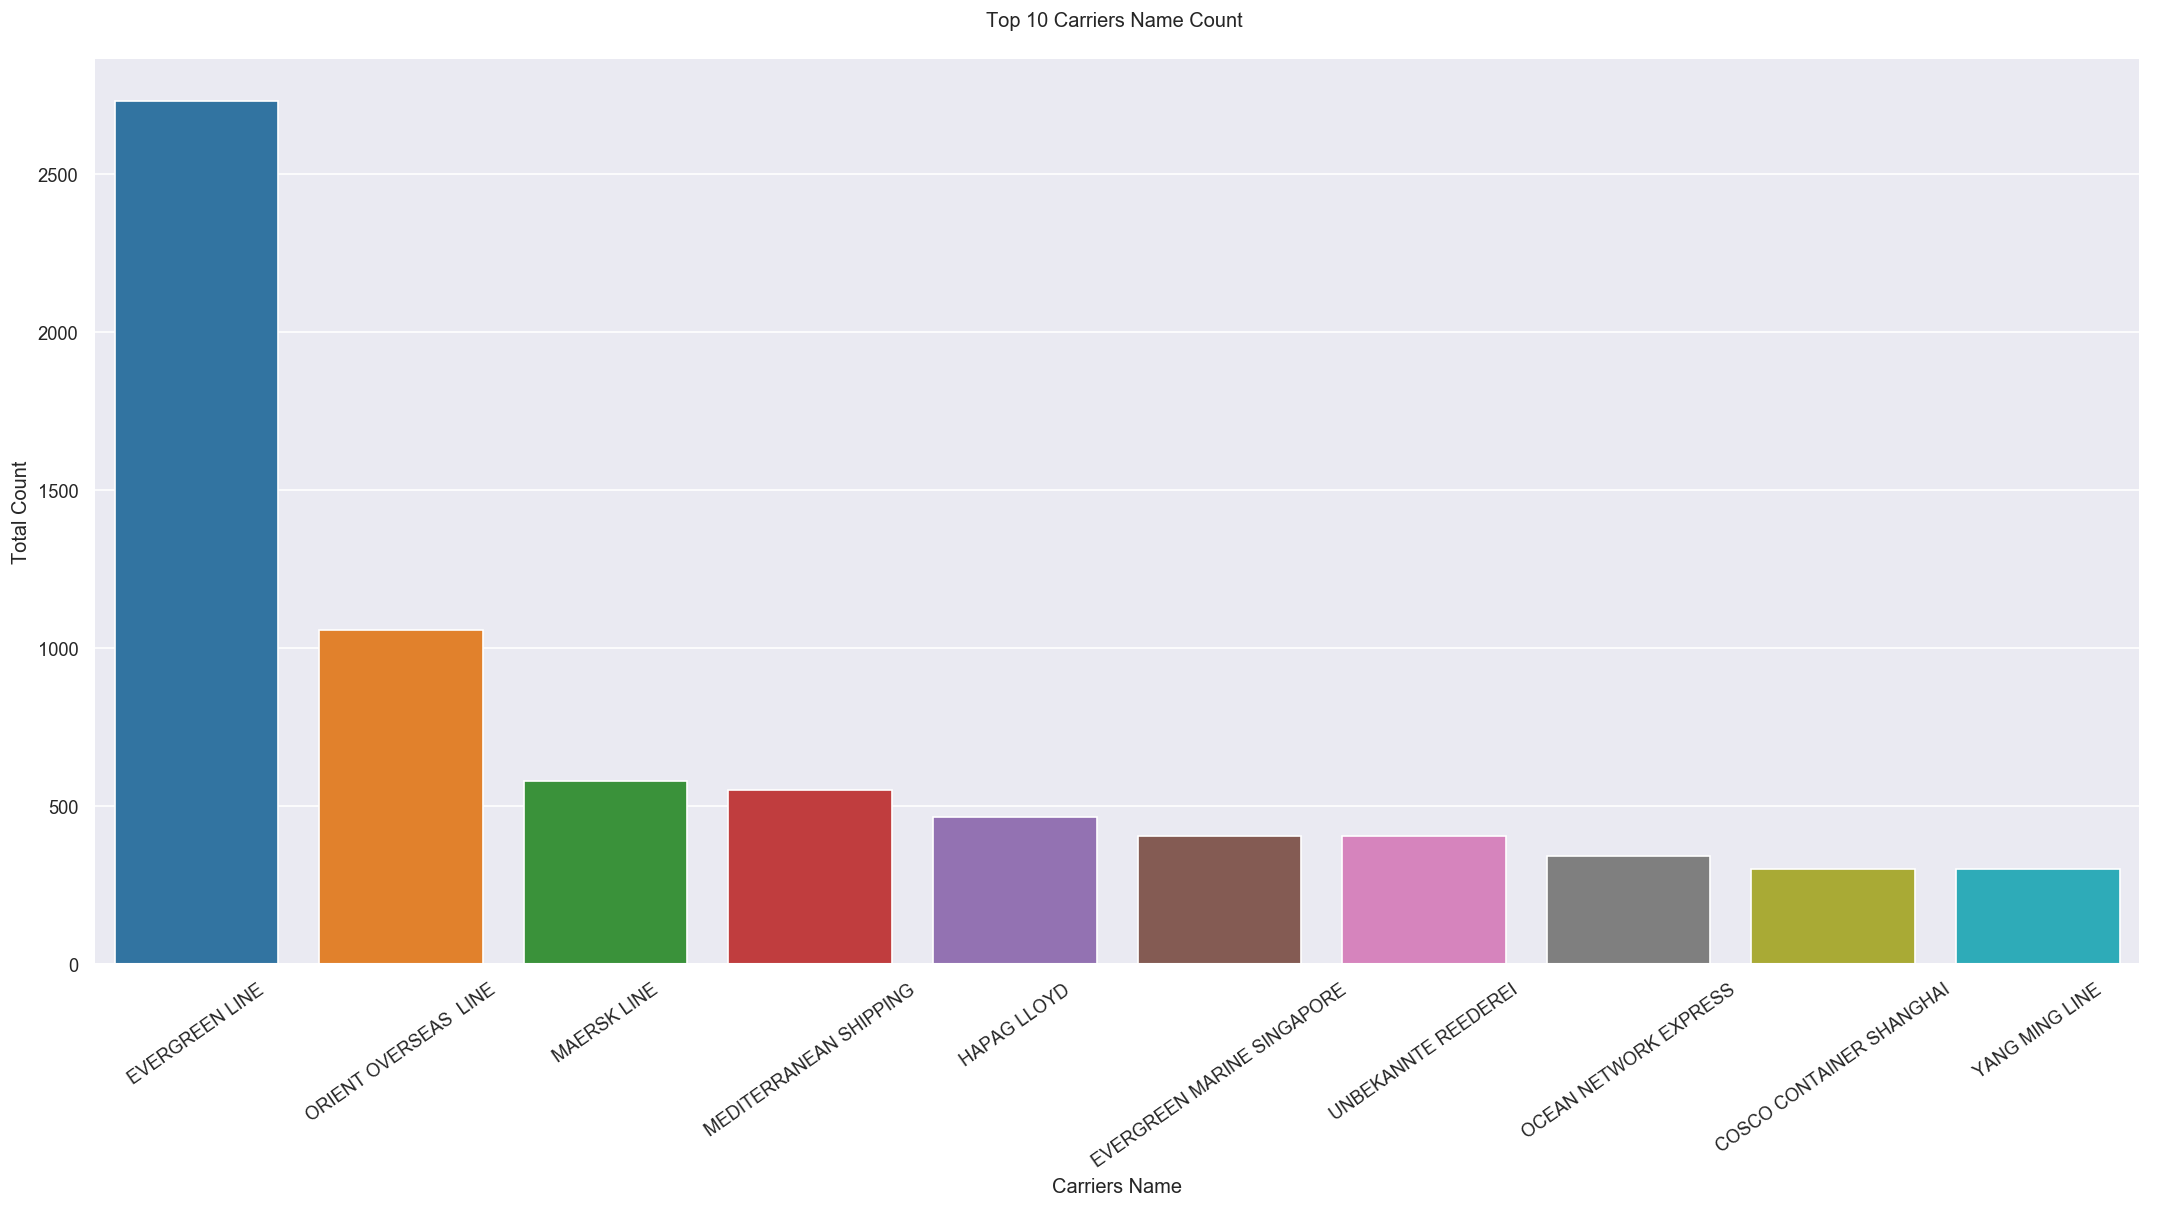

In [185]:
import seaborn as sn
sn.set_context("notebook",font_scale=1)
plt.figure(figsize=(22,10))
sn.countplot(data['Carriers Name'],order = data['Carriers Name'].value_counts().nlargest(10).index)
plt.title('Top 10 Carriers Name Count \n')
plt.ylabel('Total Count')
plt.xlabel('Carriers Name')
plt.tick_params(axis='x', rotation = 35)

In [186]:
drops = ['Dispatch Week', 'Dispatch Year', 'Client Group', 'Order No', 'Client Booking Ref.',
         'Container Nr', 'Laden Status', 'Dispatch Date', 'Date of Delivery',
         'Time of Delivery', 'Sending Railway Station', 'Receiving Railway Station', 
         'Shippers Name', 'Shippers Postal Code', 'Sippers City Name', 'No. of Debtor', 'Name of Debtor']



In [187]:
data1 = data.drop(drops, axis = 1)


In [188]:
data1.dtypes

Month of Dispacht       int64
Cont. Size              int64
Cont. Type             object
Direction              object
Gross Weight           object
Transit Time          float64
TEU Volume              int64
Carriers Name          object
White Space             int64
Costs Charged in €     object
dtype: object

In [189]:
import string

In [190]:
data1.dropna(inplace=True)

In [191]:
data1.shape

(7965, 10)

In [192]:
list(data1)

['Month of Dispacht',
 'Cont. Size',
 'Cont. Type',
 'Direction',
 'Gross Weight',
 'Transit Time',
 'TEU Volume',
 'Carriers Name',
 'White Space',
 'Costs Charged in €']

In [193]:
data1["Carriers Name"].value_counts()

EVERGREEN LINE                           2574
ORIENT OVERSEAS  LINE                    1059
MAERSK LINE                               540
MEDITERRANEAN SHIPPING                    474
HAPAG LLOYD                               429
UNBEKANNTE REEDEREI                       369
EVERGREEN MARINE SINGAPORE                342
OCEAN NETWORK EXPRESS                     342
COSCO CONTAINER SHANGHAI                  264
COMPAGNIE MARITIME D AFFRETEMENT          261
YANG MING LINE                            255
EVERGREEN INTERNATIONAL S.A.              249
HYUNDAI MERCHANT MARINE CO. LTD.          156
MOL EUROPE B.V.                            96
'K' LINE (KAWASAKI KISEN KAISHA LTD.)      78
HAMBURG SÜD GROUP                          78
EUROGATE INTERMODAL                        72
EVERGREEN MARINE CORPORATION               57
AMERICAN PRESIDENT LINE                    51
SAFMARINE CONTAINER LINES                  36
REEDER 614 UMFUHR EKOM                     27
EUROPE MEDITERRANEAN CONTAINER LIN

In [195]:
import sklearn

In [196]:
from sklearn import tree

In [197]:
import pandas
from sklearn import preprocessing 

In [198]:
data1.dtypes

Month of Dispacht       int64
Cont. Size              int64
Cont. Type             object
Direction              object
Gross Weight           object
Transit Time          float64
TEU Volume              int64
Carriers Name          object
White Space             int64
Costs Charged in €     object
dtype: object

In [199]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [200]:
data1.head()

,Month of Dispacht,Cont. Size,Cont. Type,Direction,Gross Weight,Transit Time,TEU Volume,Carriers Name,White Space,Costs Charged in €
0,2,20,DC,Import,22020,3.0,1,AMERICAN PRESIDENT LINE,0,587.51
1,2,20,DC,Import,22020,3.0,1,AMERICAN PRESIDENT LINE,0,587.51
2,2,20,DC,Import,22020,3.0,1,AMERICAN PRESIDENT LINE,0,587.51
3,2,20,DC,Import,22020,3.0,1,AMERICAN PRESIDENT LINE,0,587.51
4,2,20,DC,Import,22020,3.0,1,AMERICAN PRESIDENT LINE,0,587.51


In [202]:
data1 = data1.apply(preprocessing.LabelEncoder().fit_transform)

In [203]:
data1.head()

,Month of Dispacht,Cont. Size,Cont. Type,Direction,Gross Weight,Transit Time,TEU Volume,Carriers Name,White Space,Costs Charged in €
0,1,0,0,1,305,3,0,1,0,241
1,1,0,0,1,305,3,0,1,0,241
2,1,0,0,1,305,3,0,1,0,241
3,1,0,0,1,305,3,0,1,0,241
4,1,0,0,1,305,3,0,1,0,241


In [204]:
data1.dtypes

Month of Dispacht     int64
Cont. Size            int64
Cont. Type            int64
Direction             int64
Gross Weight          int64
Transit Time          int64
TEU Volume            int64
Carriers Name         int64
White Space           int64
Costs Charged in €    int64
dtype: object

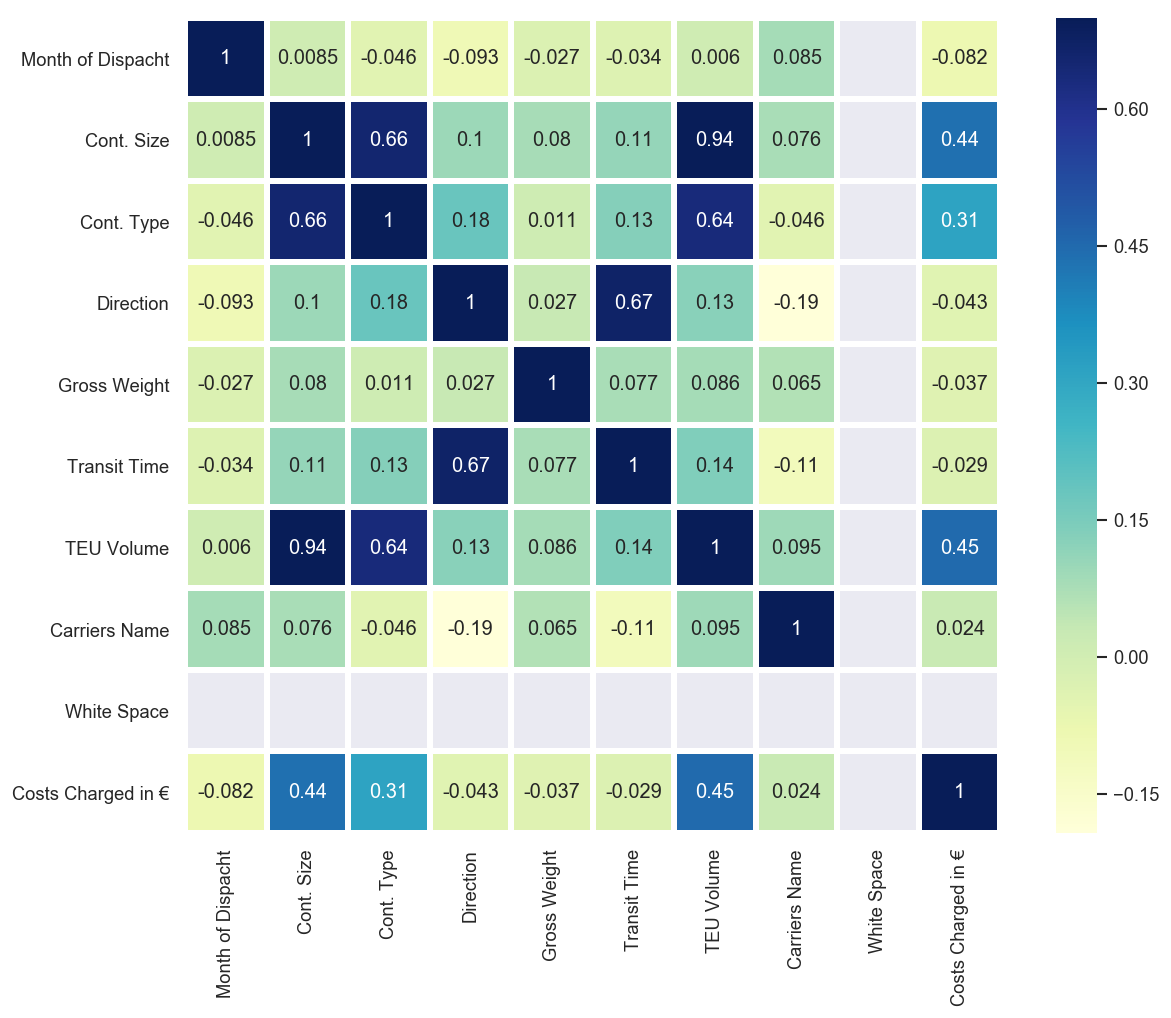

In [205]:
import matplotlib.pyplot as plt
corrmat = data1.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.7, square=True, linewidths=3, annot=True, cmap="YlGnBu")

Text(0, 0.5, 'y_pred')

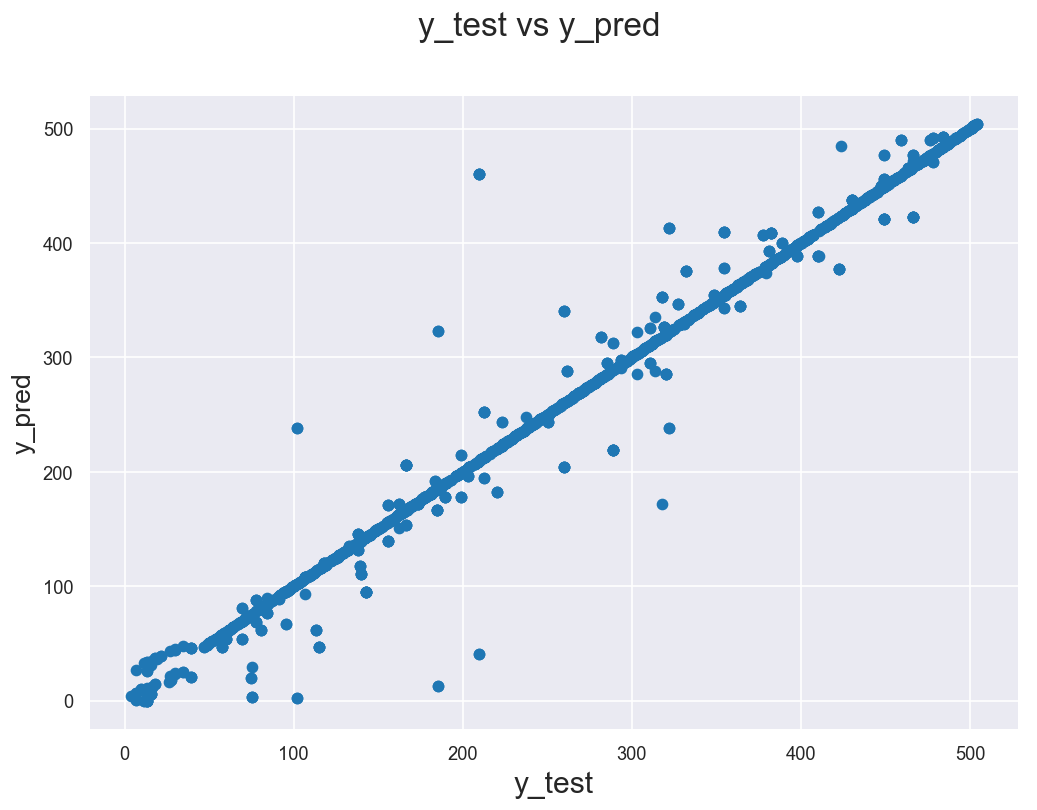

In [206]:
from scipy import stats
from scipy.stats import norm, skew 
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
#plt.scatter(y_pred_ensemble,y_true_ensemble)
plt.scatter(y_pred_ensemble,y_true_ensemble)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  


In [207]:
y = np.array(data1["Costs Charged in €"])

In [208]:
print(y)

[241 241 241 ...  96  96  96]


In [209]:
from numpy.random import randn
import pandas as pd

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [212]:
# allow plots to appear directly in the evaluation
import matplotlib

In [213]:
data1.shape

(7965, 10)

In [214]:
data1.dtypes

Month of Dispacht     int64
Cont. Size            int64
Cont. Type            int64
Direction             int64
Gross Weight          int64
Transit Time          int64
TEU Volume            int64
Carriers Name         int64
White Space           int64
Costs Charged in €    int64
dtype: object

In [215]:
data1["Costs Charged in €"].mean()
data1["Cost_average"] = data1["Costs Charged in €"].mean()

In [216]:
X = data1.drop("Costs Charged in €", axis = 1)
y = np.array(data1["Costs Charged in €"])

In [217]:
list(X)

['Month of Dispacht',
 'Cont. Size',
 'Cont. Type',
 'Direction',
 'Gross Weight',
 'Transit Time',
 'TEU Volume',
 'Carriers Name',
 'White Space',
 'Cost_average']

In [218]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

X_best = SelectKBest(chi2, k=5).fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)


In [219]:
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (5336, 10)
X_test : (2629, 10)
y_train : (5336,)
y_test : (2629,)


In [220]:
from sklearn.preprocessing import StandardScaler


In [221]:
from sklearn.metrics import r2_score,mean_absolute_error


In [222]:
data1.head()

,Month of Dispacht,Cont. Size,Cont. Type,Direction,Gross Weight,Transit Time,TEU Volume,Carriers Name,White Space,Costs Charged in €,Cost_average
0,1,0,0,1,305,3,0,1,0,241,265.06516
1,1,0,0,1,305,3,0,1,0,241,265.06516
2,1,0,0,1,305,3,0,1,0,241,265.06516
3,1,0,0,1,305,3,0,1,0,241,265.06516
4,1,0,0,1,305,3,0,1,0,241,265.06516


In [223]:
model = ensemble.BaggingRegressor()
model = model.fit(X_train, y_train)
#print("Accuracy:", model.score(X_test, y_test)) 

In [224]:
y_pred_ensemble = model.predict(X_test)
y_true_ensemble = y_test
mean_absolute_error(y_true_ensemble, y_pred_ensemble)

4.85496156618505

In [225]:
y_pred_ensemble = model.predict(X_test)
y_true_ensemble = y_test
r2_score(y_true_ensemble, y_pred_ensemble)

0.9805167830506976

In [226]:
from sklearn import model_selection
from sklearn.ensemble import BaggingRegressor
import sklearn.tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

In [227]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in model.estimators_
], axis=0)

In [228]:
feature_importances

array([0.12312786, 0.00610966, 0.02214162, 0.02521815, 0.33550785,
       0.08221356, 0.24916726, 0.15651405, 0.        , 0.        ])

In [229]:
list(data1)

['Month of Dispacht',
 'Cont. Size',
 'Cont. Type',
 'Direction',
 'Gross Weight',
 'Transit Time',
 'TEU Volume',
 'Carriers Name',
 'White Space',
 'Costs Charged in €',
 'Cost_average']

<Figure size 1200x840 with 0 Axes>

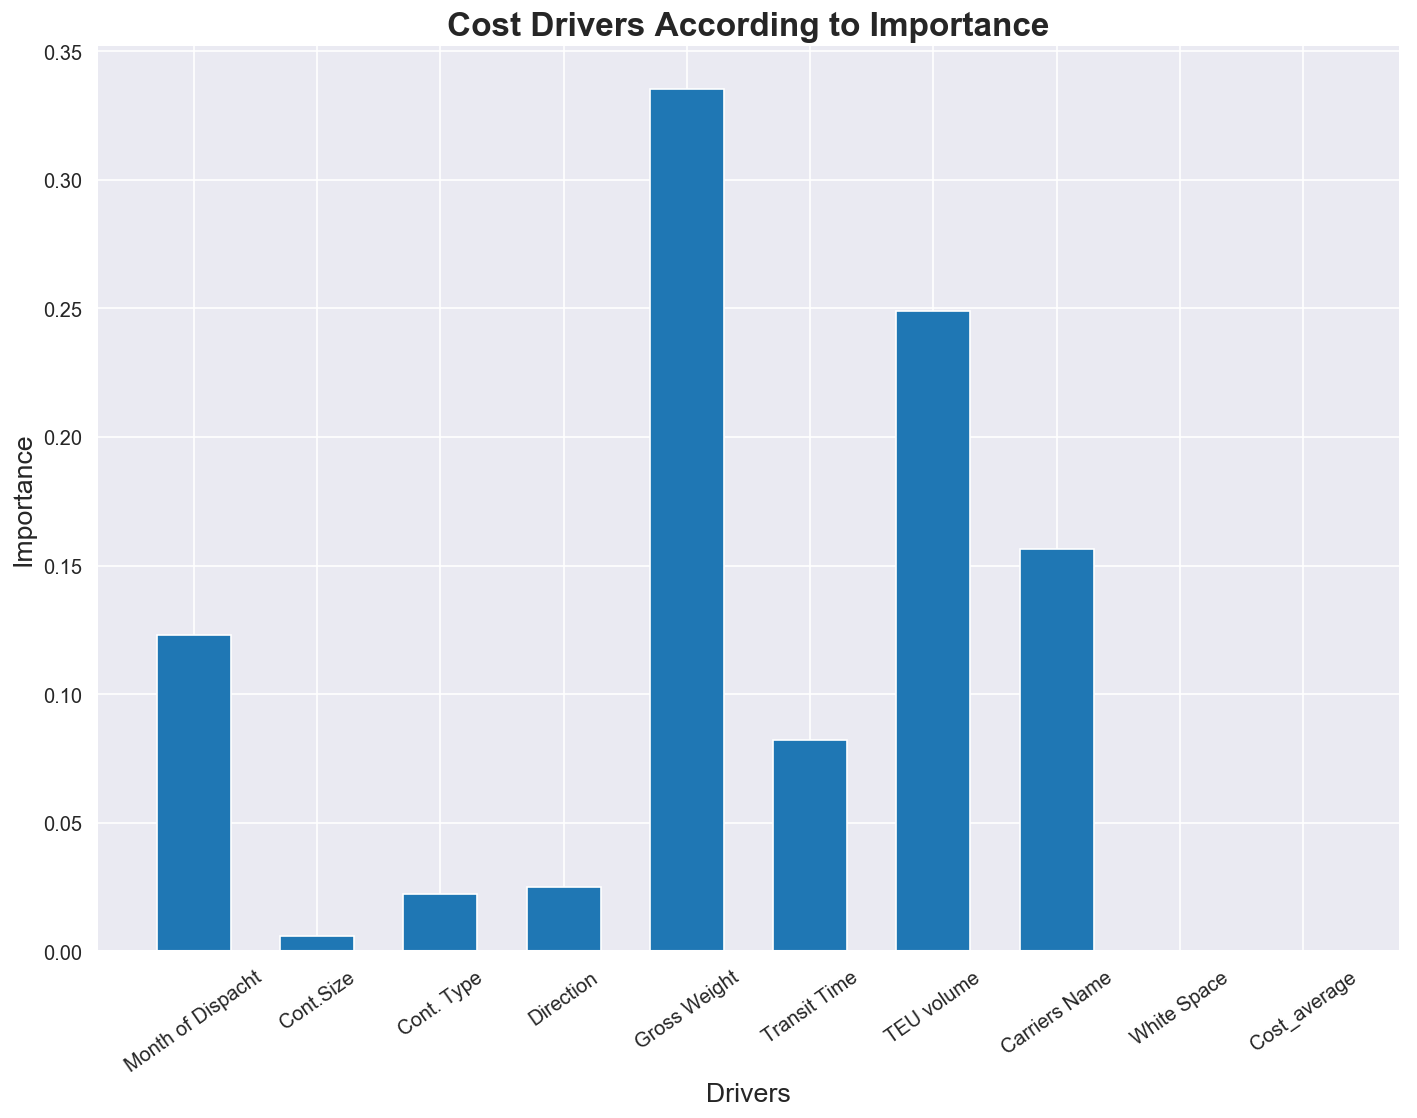

In [230]:
import numpy as np
from matplotlib import pyplot as plt
import math

fig = plt.figure()
plt.figure(figsize=(14, 10))

width = .60,
ind = ['Month of Dispacht','Cont.Size', 'Cont. Type', 'Direction', 'Gross Weight', 'Transit Time', 'TEU volume', 
       'Carriers Name', 'White Space', 'Cost_average']

plt.bar(ind, feature_importances, width=width)
plt.title("Cost Drivers According to Importance",  fontsize=20, fontweight='bold')
plt.xlabel("Drivers",  fontsize=16)
plt.ylabel("Importance",  fontsize=16)
plt.tick_params(axis='x', labelsize=12, rotation = 35)
plt.tick_params(axis='y', labelsize=12)


In [231]:
model2 = sklearn.ensemble.BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=5, max_samples=1.0, max_features=1.0,
                                        bootstrap=True, bootstrap_features=False, oob_score=False, 
                                        warm_start=False, n_jobs=None, random_state=None, verbose=0)
model2 = model2.fit(X_train, y_train)
print("Accuracy:", model2.score(X_test, y_test)) 

y_pred_ensemble = model2.predict(X_test)
y_true_ensemble = y_test
mean_absolute_error(y_true_ensemble, y_pred_ensemble)
#r2_score(y_true_ensemble, y_pred_ensemble)

Accuracy: 0.978946041402823


5.087389470991894

In [232]:
data1["Costs Charged in €"].mean()

265.0651600753296

In [233]:
data1.head()

,Month of Dispacht,Cont. Size,Cont. Type,Direction,Gross Weight,Transit Time,TEU Volume,Carriers Name,White Space,Costs Charged in €,Cost_average
0,1,0,0,1,305,3,0,1,0,241,265.06516
1,1,0,0,1,305,3,0,1,0,241,265.06516
2,1,0,0,1,305,3,0,1,0,241,265.06516
3,1,0,0,1,305,3,0,1,0,241,265.06516
4,1,0,0,1,305,3,0,1,0,241,265.06516


In [234]:
from sklearn.metrics import r2_score

In [235]:
from sklearn.metrics import mean_absolute_error

## Baseline Evaluation using Mean Absolute Error

In [236]:
y_true = data1["Costs Charged in €"]
y_pred = data1["Cost_average"]
mean_absolute_error(y_true, y_pred)

119.26954209979395

## Compare Models 

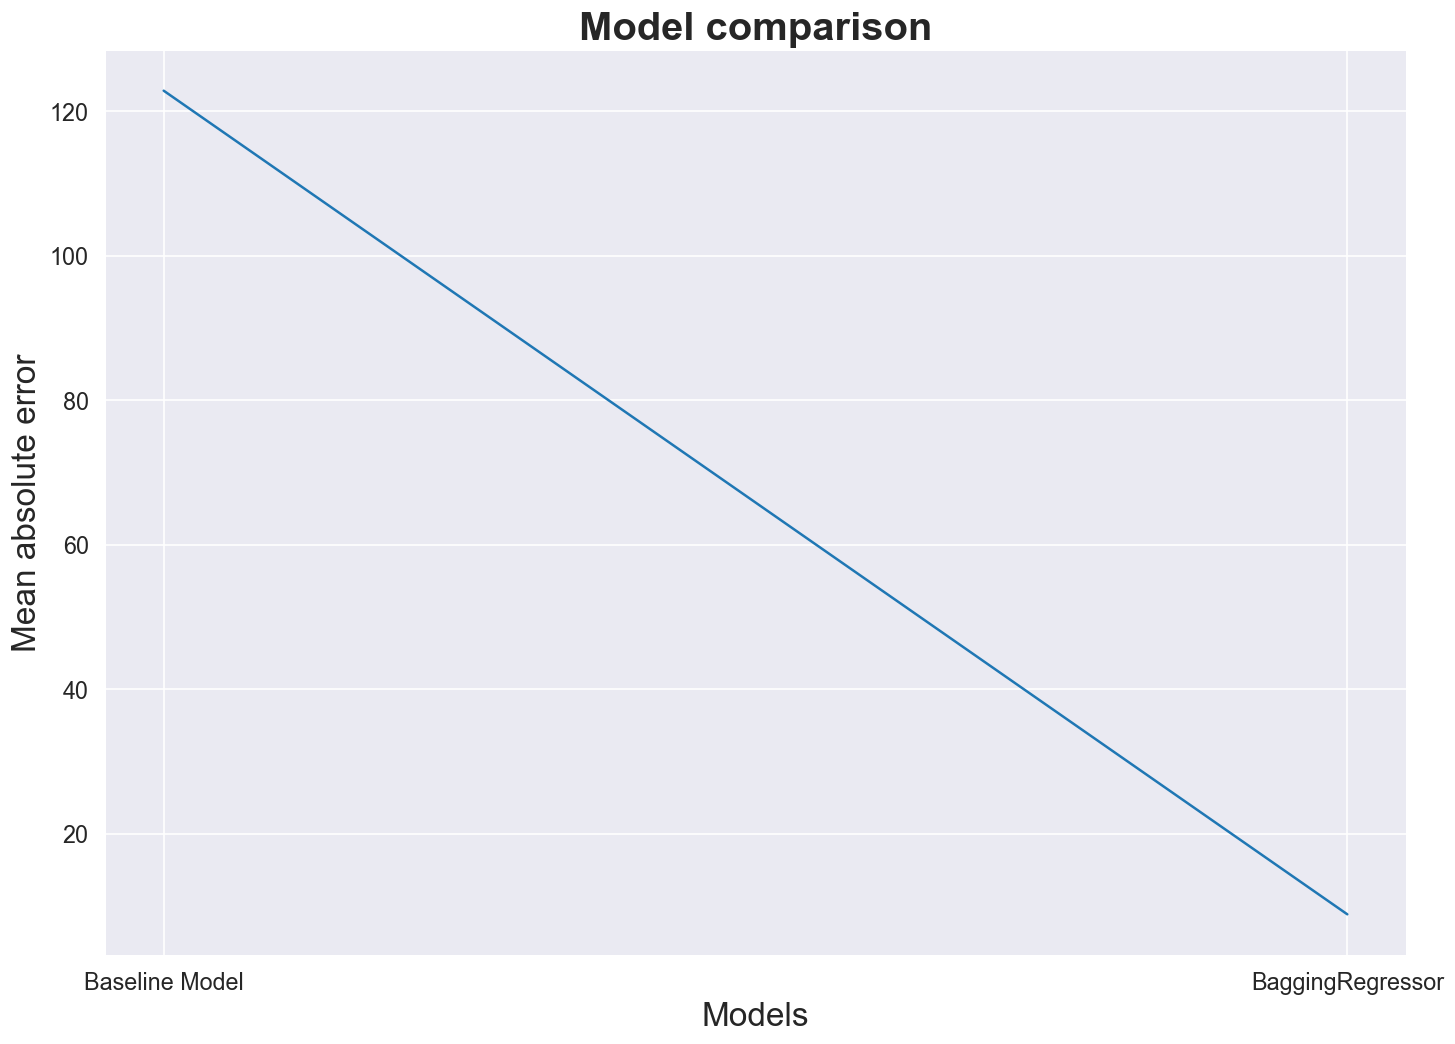

In [237]:
mean_error = [122.8159, 8.87]
plt.figure(figsize=(14,10))
plt.plot(["Baseline Model","BaggingRegressor"],mean_error)
plt.ylabel("Mean absolute error", fontsize=20)
plt.xlabel("Models", fontsize=20)
plt.title("Model comparison", fontsize=24, fontweight='bold')
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

<BarContainer object of 2 artists>

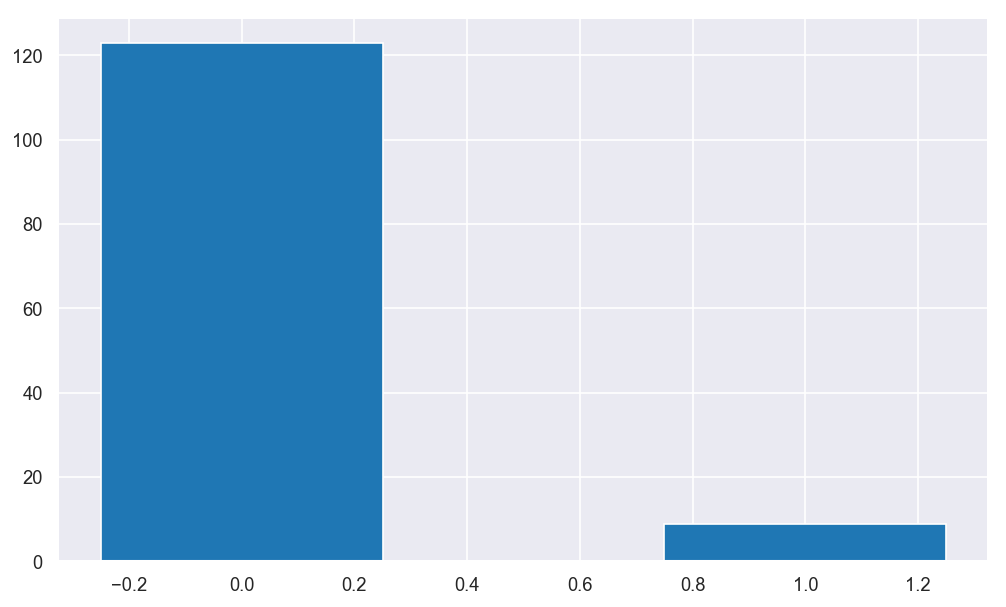

In [238]:
import numpy as np
from matplotlib import pyplot as plt


plt.figure(figsize=(10,6))
width = .50
ind = np.arange(2)
plt.bar(ind, [122.8, 8.87], width=width)

In [239]:
# baseline model - MAE - 122
# actual model - MAE - 

In [240]:
from sklearn.ensemble import ExtraTreesClassifier

In [241]:
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.20925634 0.00876393 0.02237157 0.01502484 0.38081252 0.13883837
 0.01400351 0.21092892 0.         0.        ]


In [242]:
# feature extraction
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

In [134]:
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)

C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning:

Features [8] are constant.

C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning:

invalid value encountered in true_divide

